In [10]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from main import interpolate, solve_gauss, approach

Load data

In [11]:
with open('function.txt', 'r') as f:
    points = np.array([[float(x) for x in s.split()] for s in f.readlines()])
    x_net = points[:, 0]
    f_net = points[:, 1]
    print(x_net, f_net)
N = 4

[0.   0.15 0.3  0.45 0.6  0.75 0.9  1.05 1.2  1.35 1.5  1.65 1.8  1.95
 2.1 ] [0.000000e+00 2.301000e-03 2.693200e-02 7.090200e-02 3.048200e-02
 2.411270e-01 7.126190e-01 9.943240e-01 4.828300e-01 1.107277e+00
 3.165750e+00 4.144453e+00 2.403475e+00 2.369195e+00 4.352169e+00]


In [12]:
def get_st_elm(x_net: np.ndarray, f_net, i, j, method: str, n: int = 0) -> float:
    mask = np.full(x_net.shape, True)
    mask[i] = False
    x_net_i = x_net[mask]
    f_net_i = f_net[mask]
    mask[i] = True
    mask[j] = False
    x_net_j = x_net[mask]
    f_net_j = f_net[mask]
    mask[j] = True

    if method == "interpolate":
        f_i = interpolate(x_net_i, f_net_i)
        f_j = interpolate(x_net_j, f_net_j)
    else:
        f_i = approach(x_net_i, f_net_i, n)
        f_j = approach(x_net_j, f_net_j, n)

    return np.sqrt(integrate.quad(lambda x: (f_i(x) - f_j(x)) ** 2, min(x_net), max(x_net))[0])

Building interpolating and approximating functions

In [13]:
interpol = interpolate(x_net, f_net)
appr = approach(x_net, f_net, N)

Summary graph

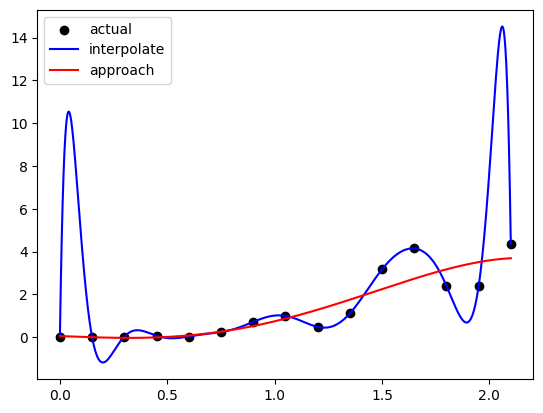

In [14]:
plt.scatter(x_net, f_net, c='k')
arg_sp = np.linspace(min(x_net), max(x_net), 1_000)
plt.plot(arg_sp, np.array([interpol(x) for x in arg_sp]), c='b')
plt.plot(arg_sp, np.array([appr(x) for x in arg_sp]), c='r')
plt.legend(["actual", "interpolate", "approach"])
plt.show()

Building stability matrix

In [15]:
m_st_interpolate = np.array([[get_st_elm(x_net, f_net, i, j, 'interpolate', N)
                              for j in range(len(x_net))] for i in range(len(x_net))])

m_st_approach = np.array([[get_st_elm(x_net, f_net, i, j, 'approach', N)
                           for j in range(len(x_net))] for i in range(len(x_net))])

Print stability matrix for interpolation

In [16]:
for i in range(len(x_net)):
    for j in range(len(x_net)):
        print(f"{m_st_interpolate[i, j]:09.3f}", end='\t')
    print()

00000.000	00117.871	00104.749	00101.824	00100.526	00099.787	00099.310	00098.979	00098.739	00098.562	00098.443	00098.405	00098.662	00102.849	00138.586	
00117.871	00000.000	00023.736	00026.577	00028.043	00028.902	00029.467	00029.872	00030.185	00030.454	00030.730	00031.140	00032.353	00043.705	00102.849	
00104.749	00023.736	00000.000	00005.125	00006.709	00007.672	00008.315	00008.788	00009.179	00009.561	00010.048	00010.959	00013.834	00032.353	00098.662	
00101.824	00026.577	00005.125	00000.000	00002.007	00003.005	00003.687	00004.204	00004.657	00005.142	00005.827	00007.152	00010.959	00031.140	00098.405	
00100.526	00028.043	00006.709	00002.007	00000.000	00001.100	00001.793	00002.337	00002.837	00003.407	00004.242	00005.827	00010.048	00030.730	00098.443	
00099.787	00028.902	00007.672	00003.005	00001.100	00000.000	00000.734	00001.294	00001.831	00002.467	00003.407	00005.142	00009.561	00030.454	00098.562	
00099.310	00029.467	00008.315	00003.687	00001.793	00000.734	00000.000	00000.589	00001.150	0000

Print stability matrix for approach

In [17]:
for i in range(len(x_net)):
    for j in range(len(x_net)):
        print(f"{m_st_approach[i, j]:09.3f}", end='\t')
    print()

00000.000	00000.073	00000.077	00000.074	00000.075	00000.073	00000.084	00000.080	00000.195	00000.150	00000.229	00000.409	00000.256	00000.332	00000.932	
00000.073	00000.000	00000.017	00000.022	00000.013	00000.004	00000.045	00000.033	00000.186	00000.138	00000.213	00000.403	00000.241	00000.317	00000.933	
00000.077	00000.017	00000.000	00000.008	00000.029	00000.020	00000.049	00000.041	00000.181	00000.135	00000.216	00000.402	00000.246	00000.322	00000.935	
00000.074	00000.022	00000.008	00000.000	00000.035	00000.026	00000.045	00000.039	00000.185	00000.136	00000.217	00000.404	00000.244	00000.321	00000.934	
00000.075	00000.013	00000.029	00000.035	00000.000	00000.009	00000.053	00000.038	00000.185	00000.139	00000.212	00000.402	00000.242	00000.318	00000.934	
00000.073	00000.004	00000.020	00000.026	00000.009	00000.000	00000.048	00000.035	00000.185	00000.138	00000.213	00000.402	00000.242	00000.318	00000.934	
00000.084	00000.045	00000.049	00000.045	00000.053	00000.048	00000.000	00000.018	00000.225	0000

In [18]:
print(f"{np.mean(m_st_interpolate)=}\n{np.mean(m_st_approach)=}")

np.mean(m_st_interpolate)=33.182942193495386
np.mean(m_st_approach)=0.2879917014319176
